<a href="https://colab.research.google.com/github/Vixuz144/Simulacion-1/blob/main/Examen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
from random import random
from numba import jit
import matplotlib.pyplot as plt
from scipy.stats import norm

In [32]:
@jit(nopython = True)
def calculo_rc2(N, p = 1):
  c = 0
  c2 = []
  for i in range(1, N+1):
    x = random()
    y = np.pi/4 * random()
    if x <= np.cos(y):
      c+=1

    if i%p == 0:
      c2.append(c/i)
  c2 = np.array(c2) * np.pi/4
  return np.pi/4 * c/N, c2

In [33]:
drc2, iter2 = calculo_rc2(1000000, 10)
rc2 = 1/drc2
print(f"El valor de 1/sqrt(2) = {drc2}\nEl valor de sqrt(2) ={rc2}\n")


El valor de 1/sqrt(2) = 0.7071882142863304
El valor de sqrt(2) =1.414050714927659



In [34]:
@jit(nopython = True)
def MC_integ(n = 100000, rep = 1000):
  l = []
  for j in range(rep):
    integ = []
    for i in range(n):
      r = 2 * random()
      integ.append(np.sqrt(1+r**4)) #funcion
    integ = np.array(integ)
    l.append(integ.mean())
  return l

In [35]:
rep = 10000
integ = MC_integ(rep = rep)
med = 2*np.array(integ).mean()
var = np.array(integ).std(ddof = 1)
print(med)
print(var)

z = norm().ppf(0.975)
print(z)
print(med - z * var /np.sqrt(rep), med + z * var /np.sqrt(rep))

3.653541130886407
0.0029158174403918504
1.959963984540054
3.6534839819147207 3.6535982798580937


In [38]:
@jit(nopython = True)
def F(N = 10**6):
  l = []
  for i in range(N):
    r =  random()
    if 0 <= r < 1/3:
      x = 3/2 * r
    else:
      x = 1/4 + np.sqrt(3/4*r  - 3/16)

    l.append(np.sqrt(1 + np.sin(x)))
  return np.array(l)

1.2415363892782496
0.010390366904971344


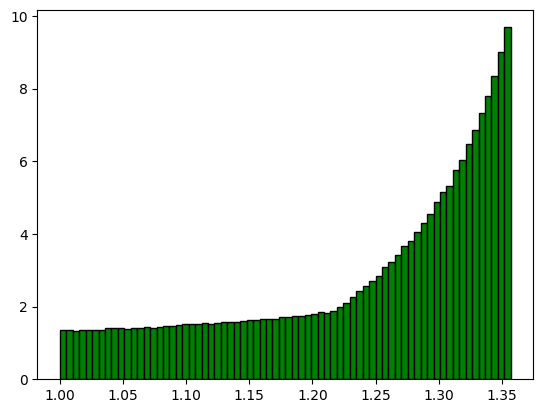

In [39]:
l = F()
print(l.mean())
print(l.var())
plt.hist(l, bins = 70, density = True, color = 'g', edgecolor = 'k')
plt.show()
